In [1]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Importing required libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\mohit\Desktop\data science\Sentiment Analysis using LSTM\amazon_alexa.tsv",sep = '\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
# Creating a new column sentiment based on overall ratings
def sentiments(df):
    if df['rating'] > 3.0:
        return 'Positive'
    elif df['rating'] <= 3.0:
        return 'Negetive'
data['sentiment'] = data.apply(sentiments,axis = 1)

In [4]:
data.head()

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,Positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,Positive


In [5]:
# Check if there are any null values
data_v1 = data[['verified_reviews','sentiment']]
data_v1.isnull().sum()

verified_reviews    1
sentiment           0
dtype: int64

In [6]:
data_v1.shape

(3150, 2)

In [7]:
data_v1 = data_v1[data_v1.verified_reviews != ' ']

In [8]:
data_v1.shape

(3071, 2)

In [13]:
def cleaning(df,stop_words):
    df['verified_reviews'] = df['verified_reviews'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
    # Replacing the digits/numbers
    df['verified_reviews'] = df['verified_reviews'].str.replace('d','')
    # Removing stop words
    df['verified_reviews'] = df['verified_reviews'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
    # Lemmatization
    df['verified_reviews'] = df['verified_reviews'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))
    return df

stop_words = stopwords.words("english")
data_v1 = cleaning(data_v1,stop_words)

In [14]:
data_v1

,verified_reviews,sentiment
0,love echo!,Positive
1,love it!,Positive
2,"sometimes playing game, answer question correc...",Positive
3,"ha lot fun thing. 4 yr ol learns inosaurs, con...",Positive
4,music,Positive
...,...,...
3145,"perfect kis, aults everyone between!!",Positive
3146,"listening music, searching locations, checking...",Positive
3147,"love things, running entire home, tv, lights, ...",Positive
3148,complaint soun quality great. mostly use comma...,Positive


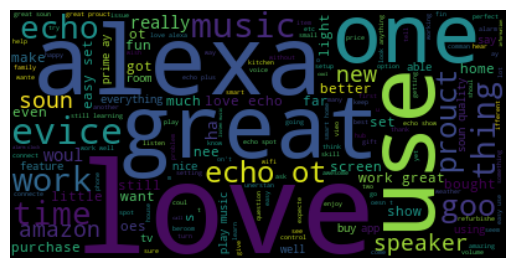

In [15]:
common_words = ''
for i in data_v1.verified_reviews:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens) + " "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [17]:
# Encoded the target column
lb = LabelEncoder()
data_v1['sentiment'] = lb.fit_transform(data_v1['sentiment'])

In [18]:
tokenizer = Tokenizer(num_words = 500,split = ' ')
tokenizer.fit_on_texts(data_v1['verified_reviews'].values)
X = tokenizer.texts_to_sequences(data_v1['verified_reviews'].values)
X

[[1, 2],
 [1, 5],
 [202, 110, 482, 164, 134, 4, 81, 49, 164, 326, 8, 66, 60, 43, 276, 24],
 [27, 78, 41, 22, 249, 157, 90, 43, 20, 482, 8, 76, 11, 110, 7, 40],
 [7],
 [268,
  2,
  155,
  296,
  91,
  139,
  165,
  20,
  7,
  269,
  310,
  32,
  14,
  341,
  432,
  82,
  270,
  120],
 [92,
  327,
  6,
  86,
  311,
  82,
  6,
  3,
  53,
  218,
  277,
  116,
  53,
  97,
  226,
  47,
  227,
  188,
  158,
  312,
  5,
  41,
  59,
  134,
  116,
  433,
  45,
  170],
 [93,
  10,
  207,
  39,
  44,
  112,
  88,
  10,
  123,
  47,
  54,
  29,
  8,
  84,
  110,
  7,
  2,
  43,
  342,
  54],
 [117, 3],
 [1, 5, 127, 483, 116, 189, 17, 142, 67, 197, 57, 3],
 [193, 157, 383, 271],
 [1, 5, 61, 22, 28, 55, 9, 46, 12, 6, 194, 45, 65, 21],
 [39,
  108,
  228,
  167,
  165,
  208,
  159,
  88,
  168,
  286,
  8,
  87,
  63,
  209,
  22,
  120,
  4,
  20,
  127,
  21,
  219],
 [1, 1, 1],
 [143],
 [1, 5, 234, 5],
 [29, 130, 39, 3, 14, 12, 13, 58],
 [74, 4, 328, 370, 78, 41, 34, 8, 34, 395, 208, 220, 178, 159

In [19]:
X = pad_sequences(X)

The pad_sequences is used to ensure that all sequences in a list have the same length. 

In [20]:
X

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   0,   1,   5],
       [  0,   0,   0, ...,  43, 276,  24],
       ...,
       [  0,   0,   0, ...,  89,  50,  32],
       [  0,   0,   0, ...,   2,  65, 124],
       [  0,   0,   0, ...,   0,   0,  16]])

In [21]:
model = Sequential()
model.add(Embedding(500,120,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176,dropout = 0.2,recurrent_dropout = 0.2))
model.add(Dense(2,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 212, 120)          60000     
                                                                 
 spatial_dropout1d (Spatial  (None, 212, 120)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269442 (1.03 MB)
Trainable params: 269442 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [22]:
# Splitting the data into training and testing
y = pd.get_dummies(data_v1['sentiment'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [24]:
batch_size = 32
model.fit(X_train,y_train,epochs = 5, batch_size = batch_size,verbose = 1)

Epoch 1/5


68/68 [==============================] - 36s 467ms/step - loss: 0.3719 - accuracy: 0.8678
Epoch 2/5
68/68 [==============================] - 31s 459ms/step - loss: 0.2700 - accuracy: 0.8883
Epoch 3/5
68/68 [==============================] - 32s 472ms/step - loss: 0.1873 - accuracy: 0.9279
Epoch 4/5
68/68 [==============================] - 32s 472ms/step - loss: 0.1442 - accuracy: 0.9409
Epoch 5/5
68/68 [==============================] - 33s 482ms/step - loss: 0.1144 - accuracy: 0.9567


In [25]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 2s 47ms/step - loss: 0.3395 - accuracy: 0.8872


[0.33950746059417725, 0.887201726436615]